In [1]:
# Neural network-Regression Task
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import f1_score
import os
print(tf.__version__)

2.17.0


In [3]:
dataset = pd.read_csv(r"C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/ai/archive/smoking_health_data_final1.csv")

In [5]:
dataset = dataset.fillna(0)

#dataset = pd.get_dummies(dataset, columns=['sex'])
#dataset = pd.get_dummies(dataset, columns=['current_smoker'])

if 'sex' in dataset.columns:
    dataset = pd.get_dummies(dataset, columns=['sex'])
if 'current_smoker' in dataset.columns:
    dataset = pd.get_dummies(dataset, columns=['current_smoker'])

In [7]:
#dataset['sex_female'] = dataset['sex_female'].replace({True: 1, False: 0})
#dataset['sex_male'] = dataset['sex_male'].replace({True: 1, False: 0})


dataset['sex_female'] = dataset['sex_female'].replace({True: 1, False: 0})
dataset['sex_male'] = dataset['sex_male'].replace({True: 1, False: 0})
dataset['current_smoker_no'] = dataset['current_smoker_no'].replace({True: 1, False: 0})
dataset['current_smoker_yes'] = dataset['current_smoker_yes'].replace({True: 1, False: 0})



In [9]:


if 'blood_pressure' in dataset.columns:
    dataset[['blood_pressure_systolic', 'blood_pressure_diastolic']] = dataset['blood_pressure'].str.split('/', expand=True)
    dataset = dataset.drop(['blood_pressure'], axis=1)

dataset

,age,heart_rate,cigs_per_day,chol,sex_female,sex_male,current_smoker_no,current_smoker_yes,blood_pressure_systolic,blood_pressure_diastolic
0,54,95,0,219.0,0,1,0,1,110,72
1,45,64,0,248.0,0,1,0,1,121,72
2,58,81,0,235.0,0,1,0,1,127.5,76
3,42,90,0,225.0,0,1,0,1,122.5,80
4,42,62,0,226.0,0,1,0,1,119,80
...,...,...,...,...,...,...,...,...,...,...
3895,37,88,60,254.0,0,1,0,1,122.5,82.5
3896,49,70,60,213.0,0,1,0,1,123,75
3897,56,70,60,246.0,0,1,0,1,125,79
3898,50,85,60,340.0,0,1,0,1,134,95


In [11]:
#X = dataset[['age', 'sex', 'current_smoker', 'heart_rate', 'cigs_per_day', 'blood_pressure_systolic', 'blood_pressure_diastolic']]
X = dataset[["age", "sex_female", "sex_male", "current_smoker_no",	"current_smoker_yes", "heart_rate", "cigs_per_day", "blood_pressure_systolic", "blood_pressure_diastolic"]]
Y = dataset['chol']

In [13]:

X = dataset.select_dtypes(include=[float, int])  # Ensure X is a DataFrame
Y_log = np.log1p(Y)  # Apply log transformation


In [15]:
#from sklearn.preprocessing import MinMaxScaler
#mmScaler = MinMaxScaler()
#X = mmScaler.fit_transform(X.astype(float))

In [17]:
test_size1 = 0.2
random_state1 = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size1, random_state=random_state1 )
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#test_size1 = 0.2 0.3 0.5
#random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#!!!!!!!!!!!!!!!!!!!!!!!


In [19]:
X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(Y_train)

print(X_train_df.head())
print(Y_train_df.head())


      age  heart_rate  cigs_per_day   chol  sex_female  sex_male  \
3304   36          70            20  204.0           0         1   
2756   48          75            17  250.0           0         1   
516    40          80             0  220.0           1         0   
3621   53          80            30  253.0           0         1   
2872   56          85            20  278.0           0         1   

      current_smoker_no  current_smoker_yes  
3304                  0                   1  
2756                  0                   1  
516                   1                   0  
3621                  0                   1  
2872                  0                   1  
       chol
3304  204.0
2756  250.0
516   220.0
3621  253.0
2872  278.0


In [21]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

In [23]:
from tensorflow.keras.regularizers import l2
activation1='relu'
kernel_regularizer1=l2(0.01)
#from tensorflow.keras.regularizers import l1_l2
#Dense(64, activation=activation1, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))


activation1 = 'relu'
kernel_regularizer1 = l2(0.01)  # Ensure the regularizer is correctly defined


model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer with appropriate shape
    Dense(64, activation=activation1, kernel_regularizer=kernel_regularizer1),
    Dense(32, activation=activation1, kernel_regularizer=kernel_regularizer1),
    Dense(32, activation=activation1, kernel_regularizer=kernel_regularizer1),
    
    Dense(1)  # Output layer for regression (1 unit, no activation)

])

#model = Sequential([
    #Input(shape=(X_train_scaled.shape[1],)),  # the input layer
    #Dense(16, activation=activation1, kernel_regularizer=kernel_regularizer1),#(0.001)), kernel_regularizer=l1(0.01)),
    #Dense(128, activation=activation1, kernel_regularizer=kernel_regularizer1), #Dense(64, activation='sigmoid') softsign,elu, selu, softmax, leakyrelu, tanhkernel_regularizer
    #Dense(1)  
#])

#!!!!!!!!!!!!!!

In [25]:


#model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

#adam, adamw, adagrad, rmsprop, adadelta, nadam

optimizer1 = 'adam'
#optimizer1 = 'nadam'
loss1 = 'mean_squared_error'
metrics1 = ['mean_absolute_error']

model.compile(optimizer=optimizer1, loss=loss1, metrics=metrics1)


#!!!!!!!!!!!!!!!!!!!!!!!!

In [27]:
model.fit(x=X_train, y=Y_train, epochs=300, batch_size=32)


Epoch 1/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - loss: 19155.6641 - mean_absolute_error: 107.9998
Epoch 2/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 29.6199 - mean_absolute_error: 3.9278
Epoch 3/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 1.7213 - mean_absolute_error: 0.5426
Epoch 4/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 1.0355 - mean_absolute_error: 0.2519
Epoch 5/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 1.8703 - mean_absolute_error: 0.2356
Epoch 6/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.6933 - mean_absolute_error: 0.1683
Epoch 7/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.6283 - mean_absolute_error: 0.1632
Epoch 8/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.8157 - mean_absolute_error: 0.2096
Epoch 9/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.6762 - mean_absolute_error: 0.1474
Epoch 10/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.6883 - mean_absolute_error: 0.1881
Epoch 11/300

In [28]:

loss, mae = model.evaluate(X_test_scaled, Y_test)
print(f"Mean Absolute Error on Test Set: {mae:.4f}")
print(f"Mean Squared Error on Test Set: {loss:.4f}")


#!!!!!!!!!!!!!!!!!!!!!!!


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 57890.0391 - mean_absolute_error: 236.8513
Mean Absolute Error on Test Set: 237.7793
Mean Squared Error on Test Set: 58650.3164


In [29]:
#Y_pred = model.predict(X_test_scaled)
Y_pred = scaler_Y.inverse_transform(model.predict(X_test_scaled))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
Y_pred

array([[225.6283 ],
       [260.2921 ],
       [225.99617],
       [249.26291],
       [228.31808],
       [218.7978 ],
       [227.65271],
       [229.03258],
       [260.9365 ],
       [246.68005],
       [336.67764],
       [224.69772],
       [222.1274 ],
       [221.90378],
       [232.3691 ],
       [215.77052],
       [219.0207 ],
       [242.95613],
       [239.72403],
       [224.70743],
       [218.5213 ],
       [226.41354],
       [219.70352],
       [218.81297],
       [225.43454],
       [221.42531],
       [217.60612],
       [217.57558],
       [227.62253],
       [252.75282],
       [228.07953],
       [234.11717],
       [224.6066 ],
       [226.0506 ],
       [220.87842],
       [221.50462],
       [259.0651 ],
       [220.90013],
       [243.44427],
       [240.82007],
       [248.82307],
       [221.20253],
       [225.46974],
       [218.605  ],
       [222.2482 ],
       [218.1401 ],
       [297.7445 ],
       [217.85564],
       [248.39355],
       [219.18416],


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Y_pred = scaler_Y.inverse_transform(model.predict(X_test_scaled))
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)



print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error on Test Set: {mae:.4f}")
print(f"R² Score on Test Set: {r2:.4f}")

Mean Squared Error: 686.7065
Mean Absolute Error on Test Set: 20.8055
R² Score on Test Set: 0.6827


In [32]:
Y_test

2970    221.0
1744    278.0
1653    207.0
3850    258.0
1336    268.0
        ...  
943     212.0
909     165.0
2640    371.0
931     199.0
2402    696.0
Name: chol, Length: 780, dtype: float64

In [33]:
import matplotlib.pyplot as plt

In [34]:
predictions =model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


In [35]:
Y_test

2970    221.0
1744    278.0
1653    207.0
3850    258.0
1336    268.0
        ...  
943     212.0
909     165.0
2640    371.0
931     199.0
2402    696.0
Name: chol, Length: 780, dtype: float64

In [36]:
Y_pred_scaled = model.predict(X_test_scaled)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


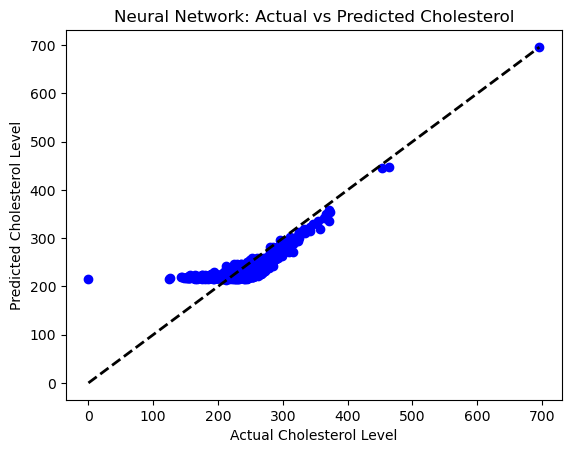

In [37]:
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Actual Cholesterol Level')
plt.ylabel('Predicted Cholesterol Level')
plt.title('Neural Network: Actual vs Predicted Cholesterol')
plt.show()

In [38]:
'''
This scatter plot compares actual cholesterol levels (x-axis) with those predicted by a neural
network model (y-axis). The dashed black line represents the ideal scenario where predictions
perfectly match actual values. Points closer to this line indicate higher accuracy, 
while points further away represent prediction errors. 
The clustering of many points near the dot black line suggests 
the neural network performs well. However, there are still outliers points where 
predictions deviate significantly. This indicates the  Neural network regression model 
struggles with extreme cholesterol levels. The Neural network model captures the general 
trend but may require improvements to handle edge cases and enhance overall accuracy.
'''

'\nThis scatter plot compares actual cholesterol levels (x-axis) with those predicted by a neural\nnetwork model (y-axis). The dashed black line represents the ideal scenario where predictions\nperfectly match actual values. Points closer to this line indicate higher accuracy, \nwhile points further away represent prediction errors. \nThe clustering of many points near the dot black line suggests \nthe neural network performs well. However, there are still outliers points where \npredictions deviate significantly. This indicates the  Neural network regression model \nstruggles with extreme cholesterol levels. The Neural network model captures the general \ntrend but may require improvements to handle edge cases and enhance overall accuracy.\n'

In [173]:
dataset = {
    # "Test_Size": test_size1,
    # "Random_state": random_state1,
    #"optimizer": optimizer1,
   
    "MSE": mse,  
    "MAE": mae,  
    "R2": r2     
}



In [175]:


# Assuming `dataset` is already defined
df = pd.DataFrame({key: [value] for key, value in dataset.items()})  # Wrap values in lists
csv_file = "neuron_network_Regression_Improve2.csv"

if not os.path.isfile(csv_file):
    df.to_csv(csv_file, mode='a', header=True, index=False)
else:
    df.to_csv(csv_file, mode='a', header=False, index=False)
    
print("Data moved to CSV file.")

Data moved to CSV file.
